In [215]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

In [216]:
def SplitData(data, split_ratio):
    # Determine number of validation data
    datanum = len(data)
    validation_num = int(datanum * (1.0 - split_ratio))

    # Randomly shuffle the data and select the indices for validation set
    indices = list(range(datanum))
    random.shuffle(indices)

    # Select the validation and training data based on shuffled indices
    validation_indices = indices[:validation_num]
    training_indices = indices[validation_num:]

    # Create the training and validation datasets using the indices
    validation_data = data[validation_indices]
    training_data = data[training_indices]

    return training_data, validation_data

In [217]:
test_datalist = pd.read_csv("data_validation.csv").to_numpy()
training_datalist  = pd.read_csv("data_train.csv").to_numpy()
np.random.shuffle(training_datalist)

In [218]:
def shift_data(datalist , d):
    newlist = []
    for i in range(len(datalist)):
        if(i < d):
            newlist.append(datalist[i])
        else:
            newlist.append(datalist[i - d])
    return np.array(newlist)

In [219]:
def modify(datalist, y_num=0):

    kiwi = datalist.T
    x = kiwi[:-6].T
    y = kiwi[-6:]

    ones_column = np.ones((x.shape[0], 1))
    # x_modify = np.hstack((x, x**0.5, np.arctan(x) ,ones_column))
    x_shift = np.hstack((x , shift_data(y.T , 1), shift_data(y.T , 2), shift_data(y.T , 3)))
    x_modify = np.hstack((x_shift, x_shift**0.5, np.arctan(x_shift) ,ones_column))

    return x_modify, y[y_num].T

qq = np.array([[18.4,1.91,0.23,0.04,0.4,4.8,5.3,38.7,14.0,14.0,0.0,86.0,1.0,1.95,53.0,58.0,2.8,2.6,38.3,12.9,25.2,0.3,0.4,5.3],
                [18.9,1.92,0.2,0.02,0.3,3.9,4.3,38.2,4.0,5.0,0.0,88.0,0.5,1.94,45.0,47.0,2.0,2.1,36.3,12.9,25.2,0.3,0.2,4.1]])
modify(qq , 0)

(array([[1.84000000e+01, 1.91000000e+00, 2.30000000e-01, 4.00000000e-02,
         4.00000000e-01, 4.80000000e+00, 5.30000000e+00, 3.87000000e+01,
         1.40000000e+01, 1.40000000e+01, 0.00000000e+00, 8.60000000e+01,
         1.00000000e+00, 1.95000000e+00, 5.30000000e+01, 5.80000000e+01,
         2.80000000e+00, 2.60000000e+00, 3.83000000e+01, 1.29000000e+01,
         2.52000000e+01, 3.00000000e-01, 4.00000000e-01, 5.30000000e+00,
         3.83000000e+01, 1.29000000e+01, 2.52000000e+01, 3.00000000e-01,
         4.00000000e-01, 5.30000000e+00, 3.83000000e+01, 1.29000000e+01,
         2.52000000e+01, 3.00000000e-01, 4.00000000e-01, 5.30000000e+00,
         4.28952212e+00, 1.38202750e+00, 4.79583152e-01, 2.00000000e-01,
         6.32455532e-01, 2.19089023e+00, 2.30217289e+00, 6.22093241e+00,
         3.74165739e+00, 3.74165739e+00, 0.00000000e+00, 9.27361850e+00,
         1.00000000e+00, 1.39642400e+00, 7.28010989e+00, 7.61577311e+00,
         1.67332005e+00, 1.61245155e+00, 6.18869938

In [220]:
def Regression(datalist , y_num = 0, num_iteration = 20000,learning_rate = 0.00000001,output = False):
    x,y = modify(datalist , y_num)
    w = np.zeros(len(x[0]))
    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(num_iteration):
        y_pred = x.dot(w)
        error = y_pred - y
        gradient = (1 / m) * x.T.dot(error)
        w -= learning_rate * gradient
        if(output):
          if iteration % (num_iteration / 100) == 0:
            print(np.sum(error))
            print(gradient)
            print(w)
            cost = (1 / float(2 * m)) * np.sum(error ** 2)
            print(f"Iteration {iteration}, Cost: {cost}\n")
    return w

In [221]:
def MatrixApproach(datalist , y_num = 0):
    x,y = modify(datalist , y_num)
    xTx = np.matmul(x.T , x)
    xTx_inv = np.linalg.inv(xTx)
    kiwi = np.matmul(xTx_inv,x.T)
    w = np.matmul(kiwi , y)
    return w

In [222]:
def MakePrediction(w, datalist):
    x , y = modify(datalist)
    prediction = x.dot(w)
    return prediction

def Calc_MAPE(prediction , ground_truth):
    MAPE = 0.0
    ll = len(prediction)
    if(ll != len(ground_truth)):
        print("Oh no")
    for i in range(ll):
        if(ground_truth[i] == 0):
            continue
        MAPE += abs ( prediction[i] - ground_truth[i] ) / ground_truth[i] / ll
    return MAPE

def Calc_MAE(prediction , ground_truth):
    MAE = 0.0
    ll = len(prediction)
    if(ll != len(ground_truth)):
        print("Oh no")
    for i in range(ll):
        if(ground_truth[i] == 0):
            continue
        MAE += abs ( prediction[i] - ground_truth[i] )  / ll
    return MAE

In [223]:
def AQI_calculator(O3, PM25, PM10, CO, SO2, NO2):
  table_of_AQI  = [0, 51, 101, 151, 201, 301, 401]          
  table_of_O3  = [0, 55, 125, 165, 205, 405, 505]       #ppb
  table_of_PM25 = [0, 15.5, 35.5, 54.5, 150.5, 250.5, 350.5]  #ug/m3   
  table_of_PM10 = [0, 51, 101, 255, 355, 425, 505]       #ug/m3
  table_of_CO  = [0, 4.5, 9.5, 12.5, 15.5, 30.5, 40.5]    #ppm
  table_of_SO2  = [0, 21, 76, 186, 305, 605, 805]       #ppb
  table_of_NO2  = [0, 31, 101, 361, 650, 1250, 1650]     #ppb
  O3_AQI = 0
  PM25_AQI = 0
  PM10_AQI = 0
  CO_AQI = 0
  SO2_AQI = 0
  NO2_AQI = 0
  for i in range (6):
    if table_of_O3[i] <= O3 < table_of_O3[i+1]:
      O3_AQI = table_of_AQI[i] + (O3 - table_of_O3[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_O3[i+1] - table_of_O3[i])
    if table_of_PM25[i] <= PM25 < table_of_PM25[i+1]:
      PM25_AQI = table_of_AQI[i] + (PM25 - table_of_PM25[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_PM25[i+1] - table_of_PM25[i])
    if table_of_PM10[i] <= PM10 < table_of_PM10[i+1]:
      PM10_AQI = table_of_AQI[i] + (PM10 - table_of_PM10[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_PM10[i+1] - table_of_PM10[i])
    if table_of_CO[i] <= CO < table_of_CO[i+1]:
      CO_AQI = table_of_AQI[i] + (CO - table_of_CO[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_CO[i+1] - table_of_CO[i])
    if table_of_SO2[i] <= SO2 < table_of_SO2[i+1]:
      SO2_AQI = table_of_AQI[i] + (SO2 - table_of_SO2[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_SO2[i+1] - table_of_SO2[i])
    if table_of_NO2[i] <= NO2 < table_of_NO2[i+1]:
      NO2_AQI = table_of_AQI[i] + (NO2 - table_of_NO2[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_NO2[i+1] - table_of_NO2[i])
  AQI = max(O3_AQI, PM25_AQI, PM10_AQI, CO_AQI, SO2_AQI, NO2_AQI)
  if(AQI > 500): AQI = 500
  return int(AQI)

In [224]:
y_title = ["next_O3","next_PM2.5","next_PM10","next_CO","next_SO2","next_NO2"]
w_list =[]
w_list_matrix = []
for i in range(6):
    print('training',y_title[i],'...')
    # w = Regression(training_datalist, i , num_iteration = 10000 , learning_rate = 0.00001 , output = True)
    w_m = MatrixApproach(training_datalist , i)
    w = MatrixApproach(training_datalist , i)
    w_list.append(w)
    w_list_matrix.append(w_m)

training next_O3 ...
training next_PM2.5 ...
training next_PM10 ...
training next_CO ...
training next_SO2 ...
training next_NO2 ...


In [225]:
pred_list ={}
matrix_list ={}
truth_list = {}

for i in range(6):
    w = w_list[i]
    w_m = w_list_matrix[i]
    temp, truth = modify(test_datalist,i)
    pred = MakePrediction(w,test_datalist)
    pred_m = MakePrediction(w_m,test_datalist)

    pred_list[y_title[i]] = pred
    matrix_list[y_title[i]] = pred_m
    truth_list[y_title[i]] = truth

    print(y_title[i], '(MAE:' ,  Calc_MAE(pred , truth) , '):')
    print(y_title[i], '(MAE(matrix):' ,  Calc_MAE(pred_m , truth) , '):')

ll = len(pred_list["next_O3"])
pred_list["next_AQI"] = []
matrix_list["next_AQI"] = []
truth_list["next_AQI"] = []

for i in range(ll):
    aqi_val = AQI_calculator(pred_list["next_O3"][i] ,pred_list["next_PM2.5"][i] ,pred_list["next_PM10"][i] ,pred_list["next_CO"][i] ,pred_list["next_SO2"][i] ,pred_list["next_NO2"][i] )
    aqi_val_m = AQI_calculator(matrix_list["next_O3"][i] ,matrix_list["next_PM2.5"][i] ,matrix_list["next_PM10"][i] ,matrix_list["next_CO"][i] ,matrix_list["next_SO2"][i] ,matrix_list["next_NO2"][i] )
    truth = AQI_calculator(truth_list["next_O3"][i] ,truth_list["next_PM2.5"][i] ,truth_list["next_PM10"][i] ,truth_list["next_CO"][i], truth_list["next_SO2"][i] , truth_list["next_NO2"][i] )
    
    pred_list["next_AQI"].append(aqi_val)
    matrix_list["next_AQI"].append(aqi_val_m)
    truth_list["next_AQI"].append(truth)


next_O3 (MAE: 3.378057209507184 ):
next_O3 (MAE(matrix): 3.378057209507184 ):
next_PM2.5 (MAE: 2.4236206789409036 ):
next_PM2.5 (MAE(matrix): 2.4236206789409036 ):
next_PM10 (MAE: 3.9194368103452475 ):
next_PM10 (MAE(matrix): 3.9194368103452475 ):
next_CO (MAE: 0.05312128370913297 ):
next_CO (MAE(matrix): 0.05312128370913297 ):
next_SO2 (MAE: 0.22588419783452915 ):
next_SO2 (MAE(matrix): 0.22588419783452915 ):
next_NO2 (MAE: 1.7739770829273327 ):
next_NO2 (MAE(matrix): 1.7739770829273327 ):


In [226]:
copy_list ={}
strawberry = [7 , 9 , 8 , 2 , 12 , 5]
# strawberry = [18,19,20,21,22,23]
for i in range(6):
    temp, truth = modify(test_datalist,i)
    # copy = test_datalist.T[strawberry[i]]
    copy = shift_data(truth , 1)
    print(copy)
    copy_list[y_title[i]] = copy.copy()
    print('Copy of',y_title[i], '(MAE:' ,  Calc_MAE(copy , truth) , '):')

ll = len(copy_list["next_O3"])
copy_list["next_AQI"] = []
for i in range(ll):
    aqi_val = AQI_calculator(copy_list["next_O3"][i] ,copy_list["next_PM2.5"][i] ,copy_list["next_PM10"][i] ,copy_list["next_CO"][i] ,copy_list["next_SO2"][i] ,copy_list["next_NO2"][i] )
    copy_list["next_AQI"].append(aqi_val)



[32.6 32.6 35.5 ... 59.1 57.2 54.5]
Copy of next_O3 (MAE: 3.7344420089581707 ):
[ 7.2  7.2  7.5 ... 37.1 34.8 33.9]
Copy of next_PM2.5 (MAE: 0.7488134947107978 ):
[27.2 27.2 26.8 ... 55.1 54.7 54.1]
Copy of next_PM10 (MAE: 1.1836653006766218 ):
[0.2 0.2 0.2 ... 0.5 0.5 0.5]
Copy of next_CO (MAE: 0.01184599256647309 ):
[1.3 1.3 1.6 ... 1.5 1.5 1.8]
Copy of next_SO2 (MAE: 0.2108167349661783 ):
[11.5 11.5  9.2 ...  8.4  7.3  7.5]
Copy of next_NO2 (MAE: 1.852558848756126 ):


pred AQI MAE 5.803488039645059
matrix AQI MAE 5.803488039645059
copy AQI MAE 2.621366625369168


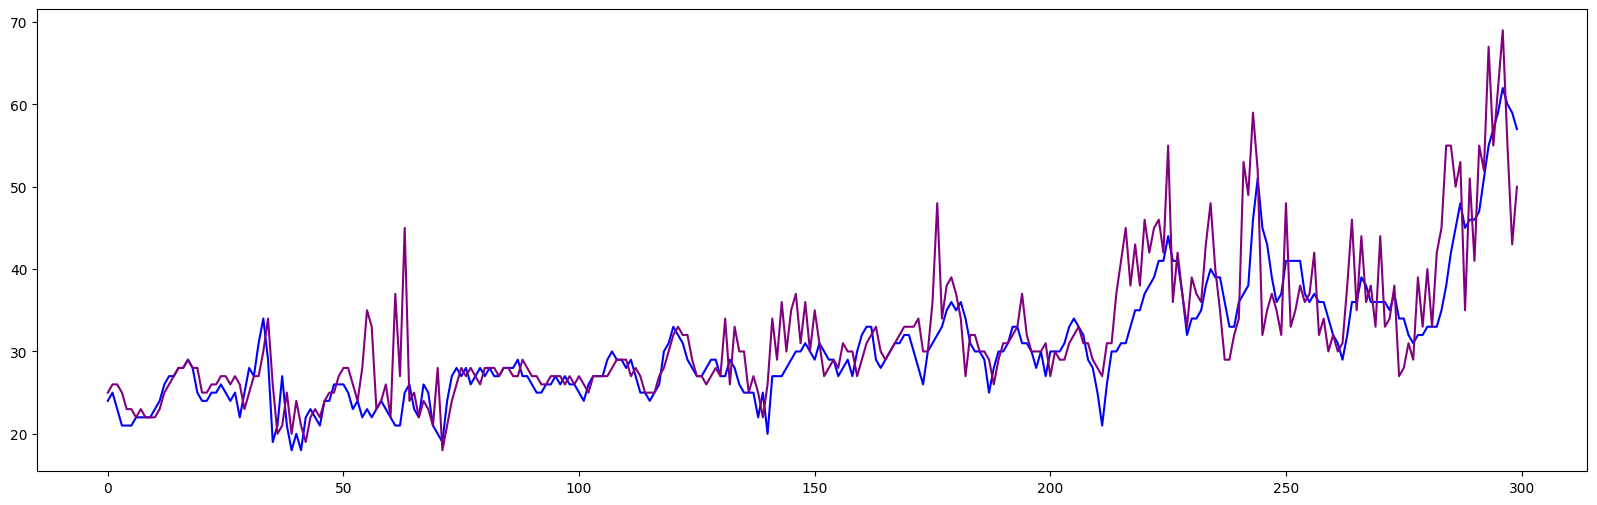

In [227]:
print('pred AQI MAE' , Calc_MAE(pred_list["next_AQI"] , truth_list["next_AQI"]))
print('matrix AQI MAE' , Calc_MAE(matrix_list["next_AQI"] , truth_list["next_AQI"]))
print('copy AQI MAE' , Calc_MAE(copy_list["next_AQI"] , truth_list["next_AQI"]))


# print('pred AQI MAPE' , Calc_MAPE(pred_list["next_AQI"] , truth_list["next_AQI"]))
# print('matrix AQI MAE' , Calc_MAPE(matrix_list["next_AQI"] , truth_list["next_AQI"]))
# print('copy AQI MAPE' , Calc_MAPE(copy_list["next_AQI"] , truth_list["next_AQI"]))


start = 1000
plt.figure(figsize=(20,6))
plt.plot(truth_list["next_AQI"][start:start+300] , 'b')
# plt.plot( copy_list["next_AQI"][start:start+300] , 'r')
# plt.plot( pred_list["next_AQI"][start:start+300] , 'g')
plt.plot( matrix_list["next_AQI"][start:start+300] , 'purple')
plt.show()



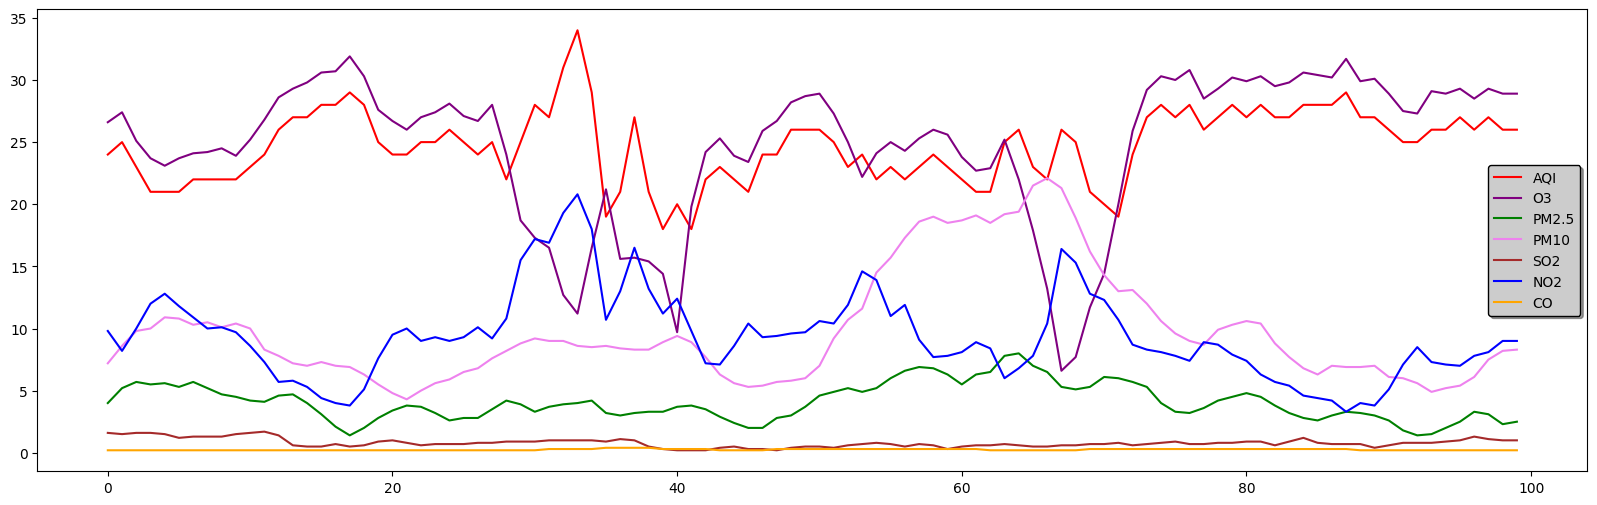

In [228]:
start = 1000
plt.figure(figsize=(20,6))
plt.plot(truth_list["next_AQI"][start:start+100] , label = 'AQI' ,  color = 'red')
plt.plot(truth_list["next_O3"][start:start+100] , label = 'O3' , color = 'purple')
plt.plot(truth_list["next_PM2.5"][start:start+100] , label = 'PM2.5' , color ='green')
plt.plot(truth_list["next_PM10"][start:start+100] , label = 'PM10' , color = 'violet')
plt.plot(truth_list["next_SO2"][start:start+100] , label = 'SO2' , color = 'brown')
plt.plot(truth_list["next_NO2"][start:start+100] , label = 'NO2' , color = 'blue')
plt.plot(truth_list["next_CO"][start:start+100] , label = 'CO' , color = 'orange')
plt.legend(
    loc='best',
    shadow=True,
    facecolor='#ccc',
    edgecolor='#000')
plt.show()